In [ ]:
!pip install nltk

In [ ]:
!pip install pandas

In [ ]:
nltk.download('all-corpora')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | D

True

In [ ]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#importing the libraries
import nltk
# Preprocessing
import re


from nltk.corpus import stopwords,wordnet
stop_words = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wlt = WordNetLemmatizer()
import pandas as pd

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the csv file

path= "/content/drive/MyDrive/fypforcolab/preprocesscsv.csv"

data_file = pd.read_csv(path, encoding="latin-1")

In [ ]:
data_file.tail()

In [ ]:
data_file['preprocess tweet'] = data_file['text'].str.lower()

In [ ]:
data_file.tail()

In [ ]:
# 01 - remove_URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

data_file['preprocess tweet'] = data_file['preprocess tweet'].apply(lambda x: remove_URL(x))

In [ ]:
data_file.head()

In [ ]:
# 02 - remove_num
def remove_num(text):
    text= re.sub('[0-9]','',text)
    text=text.strip()

    #text= ''.join(word for word in text.split() if len(word)>3)
    return text

data_file['preprocess tweet'] = data_file['preprocess tweet'].apply(lambda x: remove_num(x))

In [ ]:
data_file.head(50)

In [ ]:
# 03 - remove_Hashtag
def remove_Hashtag(text):
    Hashtag = re.compile(r'#\S+|www\.\S+')
    return Hashtag.sub(r'', text)

    data_file['preprocess tweet'] = data_file['preprocess tweet'].apply(lambda x: remove_Hashtag(x))

In [ ]:
data_file['preprocess tweet']

0        hi @askrapidkl.. got someone posting a room fo...
1        back first (@ rapidkl klcc (kj) lrt station in...
2        back first (@ rapidkl pasar seni (kj) lrt stat...
3        it has been dim for a long time. fuhh (@ rapid...
4        shop and win various exciting prizes worth up ...
                               ...                        
12200    jeez who's this guy trying to please? hold the...
12201                miss nasi lemak near masjid jamek lrt
12202    miss this view. . . last night i dreamed of ta...
12203    apparently @mrtmalaysia wasn't the most conven...
12204    unreasonably excited today because i'm taking ...
Name: preprocess tweet, Length: 12205, dtype: object

In [ ]:
# 04 - remove_Mentions
def remove_Mentions(text):
    Mentions = re.compile(r'@[^\s]+')
    return Mentions.sub(r'', text)

data_file['preprocess tweet'] = data_file['preprocess tweet'].apply(lambda x: remove_Mentions(x))

In [ ]:
data_file['preprocess tweet']

0        hi  got someone posting a room for rent withou...
1        back first (@ rapidkl klcc (kj) lrt station in...
2        back first (@ rapidkl pasar seni (kj) lrt stat...
3        it has been dim for a long time. fuhh (@ rapid...
4        shop and win various exciting prizes worth up ...
                               ...                        
12200    jeez who's this guy trying to please? hold the...
12201                miss nasi lemak near masjid jamek lrt
12202    miss this view. . . last night i dreamed of ta...
12203    apparently  wasn't the most convenient public ...
12204    unreasonably excited today because i'm taking ...
Name: preprocess tweet, Length: 12205, dtype: object

In [ ]:
# 05 - remove_emoji
def remove_Emoji(text):
    Emoji= re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return Emoji.sub(r'',text)


data_file['preprocess tweet'] = data_file['preprocess tweet'].apply(lambda x: remove_Emoji(x))

In [ ]:
data_file.tail(50)

In [ ]:
# 06 - remove_punctuation
import string

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


data_file['preprocess tweet'] = data_file['preprocess tweet'].apply(lambda x: remove_punct(x))

In [ ]:
data_file['preprocess tweet']

0        hi  got someone posting a room for rent withou...
1        back first  rapidkl klcc kj lrt station in kua...
2        back first  rapidkl pasar seni kj lrt station ...
3        it has been dim for a long time fuhh  rapidkl ...
4        shop and win various exciting prizes worth up ...
                               ...                        
12200    jeez whos this guy trying to please hold the p...
12201                miss nasi lemak near masjid jamek lrt
12202    miss this view   last night i dreamed of takin...
12203    apparently  wasnt the most convenient public t...
12204    unreasonably excited today because im taking m...
Name: preprocess tweet, Length: 12205, dtype: object

In [ ]:
stopwords_nltk = stopwords.words('english')
stopwords_nltk.append('even')
stopwords_nltk.append('ever')
stopwords_nltk.append('etc')
stopwords_nltk.append('still')
stopwords_nltk.append('say')
stopwords_nltk.append('im')
stopwords_nltk.append('tell')
stopwords_nltk.append('thats')

not_stopwords_nltk = {'no','nor','can','don',"don't",'ain','aren',"aren't",
                      'couldn',"couldn't",'mustn',"wouldn't",'wouldn','won',
                      "won't","didn't",'didn','wasn',"wasn't","haven't"}

real_stopwords_nltk= set([word for word in stopwords_nltk if word not in
                          not_stopwords_nltk])
print (real_stopwords_nltk)

def stopwords(text):
    return " ".join([word for word in stopwords_nltk if word not in not_stopwords_nltk])

{'themselves', 'm', 'doesn', 'doing', 'only', 'theirs', 'just', 'those', 'you', 'been', 'him', 'and', "mightn't", 'hadn', 'that', 'on', 'further', 'a', 've', 'haven', 'will', 'all', 'etc', 'but', 'myself', 'say', 'by', 'it', 's', 'are', 'whom', 'until', 'under', 'me', 'my', "weren't", 'about', "it's", 'were', 'because', 'when', 'out', 'weren', 'them', 'we', 'too', "hadn't", "you'll", 'our', 'an', 'her', "that'll", 'tell', 'they', 'how', 'did', 'as', 't', 'then', 'y', 'so', "needn't", 'be', "mustn't", "isn't", 'for', 'above', 'ourselves', "shouldn't", 'before', 'should', 'up', 'even', 'this', "you've", 'which', 'he', 'any', 'other', 'such', "hasn't", 'i', 'below', 'off', 'now', 'needn', 'do', 'his', 'who', 'again', 'between', 'down', 'im', 'am', 'does', 'ours', "doesn't", 'ever', 'few', 'herself', 'some', 'itself', 'there', 'through', "you're", 'mightn', 'was', 'against', "you'd", 'o', 'into', 'or', 'of', 'have', 'from', 'each', 'shouldn', 'your', 'both', 'is', 'over', "should've", 'had

In [ ]:
def tokenization(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.split('\W+', text)
    return text

data_file['preprocess tweet'] = data_file['preprocess tweet'].apply(tokenization)

In [ ]:
data_file.tail(50)

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ,"R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join ([lemmatizer.lemmatize(word,wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data_file['preprocess tweet'] = data_file['preprocess tweet'].apply(lemmatize_words)

In [ ]:
data_file.tail(50)

In [ ]:
data_file['preprocess tweet']

0         hi get someone post a room for rent without r...
1         back first rapidkl klcc kj lrt station in kua...
2         back first rapidkl pasar seni kj lrt station ...
3         it have be dim for a long time fuhh rapidkl m...
4         shop and win various excite prize worth up to...
                               ...                        
12200     jeez who this guy try to please hold the pole...
12201               miss nasi lemak near masjid jamek lrt 
12202     miss this view last night i dream of take a p...
12203     apparently wasnt the most convenient public t...
12204     unreasonably excite today because im take my ...
Name: preprocess tweet, Length: 12205, dtype: object

In [ ]:
data_file.head(150)


NameError: name 'data_file' is not defined

In [ ]:
!pip install wordcloud

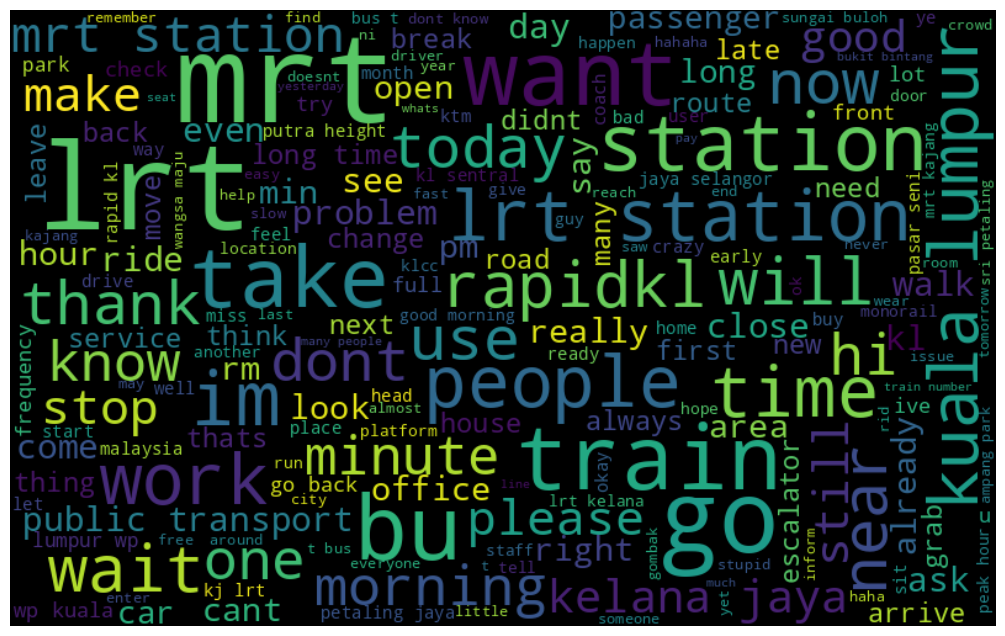

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in data_file['preprocess tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

import matplotlib.pyplot as plt
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dataClean = pd.DataFrame(data_file[['preprocess tweet']])

In [ ]:
dataClean['preprocess tweet']

0        hi get someone post a room for rent without ra...
1        back first rapidkl klcc kj lrt station in kual...
2        back first rapidkl pasar seni kj lrt station i...
3        it have be dim for a long time fuhh rapidkl ma...
4        shop and win various excite prize worth up to ...
                               ...                        
12200    jeez who this guy try to please hold the pole ...
12201                miss nasi lemak near masjid jamek lrt
12202    miss this view last night i dream of take a pl...
12203    apparently wasnt the most convenient public tr...
12204    unreasonably excite today because im take my f...
Name: preprocess tweet, Length: 12205, dtype: object

In [ ]:
# prompt: export the csv file

data_file.to_csv('preprocessed_data done.csv')
